# Mechanical Design - P1 Conceptual Design

## Table of Contents
* 1. [Preliminaries](#preliminaries)
* 2. [Introduction](#introduction)
    * 2.1 [General Goal](#general-goal)
    * 2.2 [Specific Goals](#specific-goals)
* 3. [Exercises](#exercises)
    * [E1](#e1)
    * [E2](#e2)
    * [E3](#e3)
    * [E4](#e4)
    * [E5](#e5)
    * [E6](#e6)
    * [E7](#e7)
    * [E8](#e8)


## Preliminaries

This *jupyter notebook* presents the instructions for the practical P1 of the module **Mechanical Design in Robotics**. A *jupyter notebook* can be easily used in *vscode* using the extension *ms-python.python* or in *spyder* installing the plugin *spyder-notebook*, which can be done using *conda* as follows:
```
conda install spyder-notebook -c conda-forge
```

The following packages are necessary for this practical:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize, LinearConstraint, Bounds
from matplotlib import cm
from matplotlib.ticker import LinearLocator
#%matplotlib widget

## Introduction

### General Goal

In the practicals **P1-P5**, a **slider-crank** mechanism as the one depicted in the figure below will be designed. By the end of P5, the actual mechanism will be tested as a bottle crusher, as in **this video - add video of final mechanism**.

![Figure 1: Slider-crank mechanism](slider_crank.png)

### Specific Goals

The practical **P1 - Conceptual Design**, is dedicated to the definition of an optimal mechanism geometry given by $l^*$ and $r^*$. Three main goals should be addressed:

1. Considering that a constant compression force $F$ should be generated, the optimal $l^*$ and $r^*$ should minimize the necessary $M$ to generate it;
2. The amplitude of the linear motion developed by the slider link $A_1$ should be greater than a given length $d_{min}$;
3. The whole mechanism should fit in a rectangular surface, as depicted below:

![Figure 2: constraints_hmax_wmax](constraints_hmax_wmax.png)

A rationale similar to the one used in this [CM Notes](https://seafile.lirmm.fr/f/c990ce3af5de482abb80/) will be used. The optimal lengths $l^*$ and $r^*$ are defined in the sense that they are the solution of an **optimization problem**. Such optimization problem should systematize the aforementioned points 1-3.


## Exercises

### E.1

Write a function that computes $\beta$, taking as arguments $\theta$, $r$ and $l$.

In [14]:
def beta_fun(theta, r, l):

    beta = np.arcsin(r / l * np.sin(theta))

    return beta

### E.2

In accordance with the [CM notes](https://seafile.lirmm.fr/f/c990ce3af5de482abb80/), the compression force $F$ generated by a moment $M$ can be given by
$$
F = \frac{M\,\cos\beta}{r\,\sin(\theta-\beta)}
$$

Based on the equation above, write a python function of $c(\theta,r,l)$ such that

$$
F = M\,c(\theta,r,l)
$$

In [12]:
def c_fun(theta,r,l):
    beta = beta_fun(theta, r, l)

    thresh = 0.01
    if (abs(theta-beta) < thresh):
      return np.nan

    c = np.cos(beta) / (r * np.sin(theta - beta))

    return c

#### E.3

Clearly, the values of $c(\theta,r,l)$ changes along $\theta$. For $r = 0.3\text{ m}$ and $l = 0.6\text{ m}$, compute $c(\theta)$ for $0 < \theta < \pi $ and plot the obtained values. Trying to do so, two main problems should be solved:

- The case $\theta = \beta = 0$ leads to a null denominator of the expression of $c$. The function `c_fun` should prevent this issue returning `np.nan` if $|\theta - \beta| < \epsilon$.
- If $\epsilon$ is small, very large values of $c$ can be obtained for $\theta\rightarrow 0$ or $\theta\rightarrow \pi$. To avoid that, plot only values of $0.2 < \theta < \pi -0.2 $

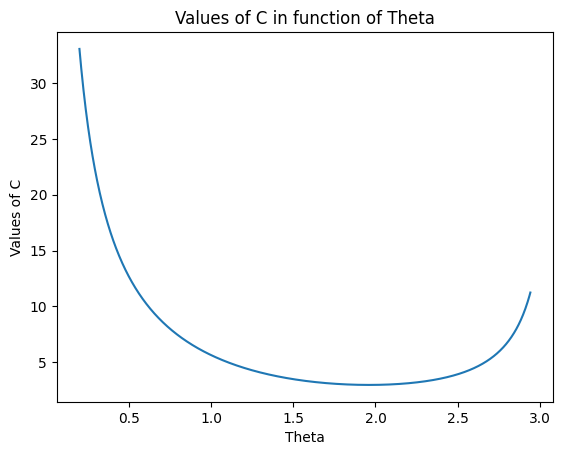

In [5]:
if __name__ == '__main__':
    r       = 0.3
    l       = 0.6

    t_val = np.linspace(0.2, math.pi-0.2, 1000)
    val = []
    for theta in t_val:
      val.append(c_fun(theta, r, l))

    plt.plot(t_val, val)
    plt.title("Values of C in function of Theta")
    plt.xlabel("Theta")
    plt.ylabel("Values of C")

#### E.4

Consider that a constant compression force of $F = 5\text{ N}$ is necessary and the available motor is able to deliver $M = 1\text{ N.m}$. Visually checking the chart created in the previous exercise, what conclusion can be drawn? In order to draw this conclusion, one does not need to have access to all the values of $c(\theta)$. What value of $c(\theta)$ one should look for in this chart?

*Answer E.4*

We know that $F = M\,c$ and $M = 1$

So to have $F = 5$ we need to have $c = 5$

#### E.5

For given $r$ and $l$, develop a python function `c_min` able to find the minimal value of $c(\theta,r,l)$, with $0<\theta<\pi$. To do so, the function `scipy.optimize.minimize` can be used. A hint of how this function can be used is presented below. Note that the use of `lambda` functions can be useful in this kind of application.

In [9]:
def c_min(r,l):
    # TODO
    x0 = 1.4
    obj_fun     = lambda theta: c_fun(theta, r, l)
    bounds      = [(0.2, math.pi-0.2)]
    sol         = minimize(obj_fun, x0, bounds=bounds)

    # Hint
    parameter1  = 2.
    parameter2  = 3.
    upper_bound = 1.5
    lower_bound = 0.5
    x0          = 1.4
    obj_fun     = lambda x: (parameter1*x**2 + 3*x*parameter2)
    sol2        = minimize(obj_fun,x0,bounds=[(lower_bound,upper_bound)])
    return sol

if __name__ == '__main__':
    # TODO Test your code based on the chart of E.6
    opt = c_min(0.3, 0.6)
    print(opt)
    print(opt.fun)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 2.9676901606262405
        x: [ 1.960e+00]
      nit: 4
      jac: [ 8.882e-08]
     nfev: 12
     njev: 6
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
2.9676901606262405


#### E.6

Consider that the value of the desired force $F$ is known. In order to minimize the necessary $M$, how $r$ and $l$ should be chosen?

*Answer E.6*

We know the minimum of *c* is linked to the values of *r* and *l*.

We want to minimize M and for that using a desired force *F* known we only have to minimize *c*.

So we are choosing *r* and *l* so that it maximize the minimum of *c*.

#### E.7

At this point, you should have understood the main rationale to obtain the optimal geometry with respect to the aspect 1 presented in the [Introduction](#introduction). In order to formulate the final optimization problem, the constraints of aspects 2 and 3 should be formulated as inequalities. The function `scipy.optmize.minimize` can be used to solve constrained optimization problems of type
$$
\begin{aligned}
\tag{1}
\min_{\mathbf{x}} \ & f(x) \\
\text{s.t. } &\mathbf{b}_{min} \leqslant \mathbf{A\,x} \leqslant \mathbf{b}_{max} \\
& \mathbf{x}_{min} \leqslant \mathbf{x} \leqslant \mathbf{x}_{max}
\end{aligned}
$$

The aspects 1-3 presented in the introduction can be formulated as (1), applying $\mathbf{x} = [r\ l]^T$. Define suitable expressions for $f(\mathbf{x})$, $\mathbf{A}$, $\mathbf{b}_{min}$, $\mathbf{b}_{max}$, $\mathbf{x}_{min}$ and $\mathbf{x}_{max}$ in order to comply with the aspects 1-3.

*Answer E.7*


The informations that we have at our disposition are :
$$
2r \leqslant h_{max} \\
2r+l \leqslant w_{max} \\
2r \geqslant d_{min} \\
r < l - ϵ
$$

First we find $x_{min}$ and $x_{max}$ using the fact that $\mathbf{x} = [r\ l]^T$ and $\mathbf{x}_{min} \leqslant \mathbf{x} \leqslant \mathbf{x}_{max}$

$$
r \leqslant \frac{h_{max}}{2} \\
l \leqslant w_{max}-h_{max} \\
r \geqslant \frac{d_{min}}{2} \\
r-l < -ϵ
$$

So we have :
$$
\mathbf{x_{min}} =
\begin{bmatrix}
\frac{d_{min}}{2} \\
0
\end{bmatrix}
$$

$$
\mathbf{x_{max}} =
\begin{bmatrix}
\frac{h_{max}}{2} \\
w_{max} - h_{max}
\end{bmatrix}
$$

And we can also find $\mathbf{A}$ and $\mathbf{b_{min}}, \mathbf{b_{max}}$ using :

$$
\mathbf{b_{min}} \leqslant \mathbf{A}*\begin{bmatrix}
r \\
l
\end{bmatrix}
\leqslant \mathbf{b_{max}}
$$

$$
\mathbf{A} =
\begin{bmatrix}
2 & 0 \\
2 & 1 \\
1 & -1
\end{bmatrix}
$$

$$
\mathbf{b_{min}} =
\begin{bmatrix}
d_{min} \\
- ∞ \\
- ∞
\end{bmatrix}
$$

$$
\mathbf{b_{max}} =
\begin{bmatrix}
h_{max} \\
w_{max} \\
- ϵ
\end{bmatrix}
$$


#### E.8

Apply `scipy.optmize.minimize` along with `scipy.optimize.LinearConstraint` in order to solve the obtained optimization problem. Consider:
- $d_{min} = 0.1 \text{ m}$
- $h_{max} = 0.4 \text{ m}$
- $w_{max} = 0.215 \text{ m}$

In [17]:
if __name__ == '__main__':
    dmin    = 0.1
    hmax    = 0.4
    wmax    = 0.215
    epsi    = 0.0001
    # TODO

    # Hint: how to use minimize
    A       = np.array([[2,0],[2,1],[1,-1]])
    bmin    = np.array([dmin,-np.inf,-np.inf])
    bmax    = np.array([hmax,wmax,-epsi])
    lin_con = LinearConstraint(A = A, ub = bmax, lb = bmin)
    xmin    = np.array([dmin/2,0])
    xmax    = np.array([hmax/2,wmax])
    bounds  = Bounds(lb = xmin, ub = xmax)
    x0      = [0.3,0.6]
    f       = lambda x : -c_min(x[0], x[1]).fun
    xoptim  = minimize(f,x0,bounds=bounds,constraints=lin_con)
    print(xoptim)




 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -18.301076988102256
       x: [ 5.000e-02  1.150e-01]
     nit: 3
     jac: [ 4.285e+02 -2.717e+01]
    nfev: 6
    njev: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


#### Extra Exercise

Plot the values of $c_{min}(r,l)$ for $0.2\leqslant r\leqslant 0.4$ and $0.3\leqslant l\leqslant 0.8$.

<ipython-input-14-c1a31ec9b4ff>:3: RuntimeWarning: invalid value encountered in arcsin
  beta = np.arcsin(r / l * np.sin(theta))


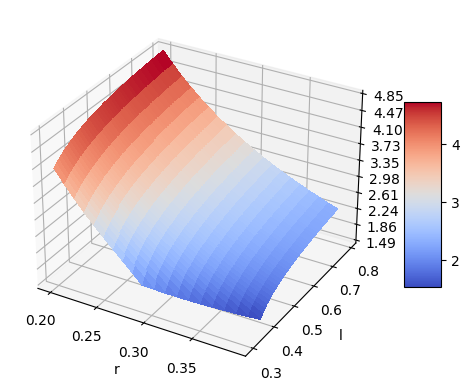

In [19]:
if __name__ == '__main__':
    R = np.arange(0.2, 0.4, 0.01)
    L = np.arange(0.3, 0.8, 0.01)
    R, L = np.meshgrid(R, L)
    n,m     = R.shape
    Z       = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            Z[i,j] = c_min(R[i,j], L[i,j]).fun#np.sin(10*R[i,j]*np.sin(10*L[i,j]))

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(R, L, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('r')
    plt.ylabel('l')
    plt.show()
